In [1]:
import numpy as np
import matplotlib.pyplot as plt
import examples

# Polynomial Regression

In many regression problems the relationship between the input feature $(x)$ and the ouput value $(y)$ is **nonlinear**. 
In this Jupyter Notebook, you'll learn how to use a linear model to fit nonlinear data.

**Table of Contents**

- [A Toy Dataset](#1.-A-First-Example)
- [Adding Polynomial Features](#2.-Adding-Polynomial-Features)
- [Example: Predicting Body Fat Percentage by Body Mass Index](#3.-Example:-Predicting-Body-Fat-Percentage-by-Body-Mass-Index)

## 1. A Toy Dataset

Let us generate some nonlinear data, based on the cubic equation $-10x^3+2x^2+8x$ (plus some random noise)

(-5.0, 6.0)

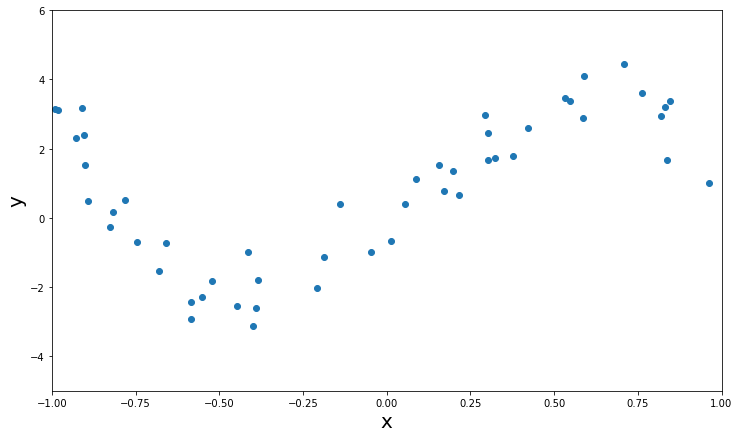

In [2]:
'generate some nonlinear data'
m=50
x = -1 + 2*np.random.rand(m)
y = -10*x**3+2*x**2+8*x + 0.75*np.random.randn(m)

plt.figure(figsize=(12,7))
plt.plot(x,y,'o')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.xlim([-1,1])
plt.ylim([-5,6])

Clearly, a straight line will never fit this data properly.

Mean Squared Error: 3.4143918555895043


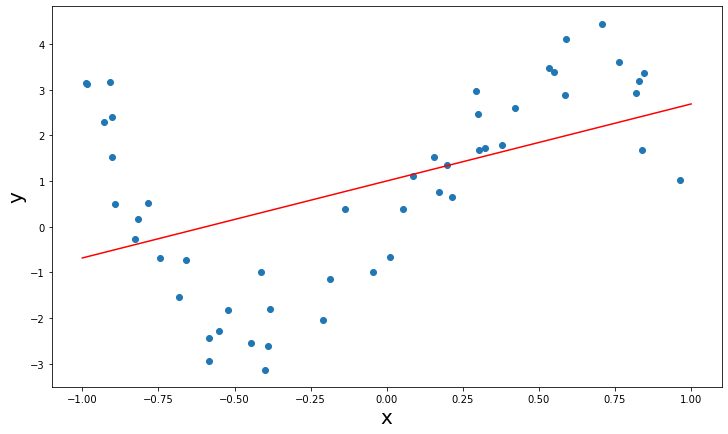

In [3]:
'build feature matrix'
m = len(x)
X = np.ones((m,2))
X[:,1] = x

'fit a line to the model'
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))

'plot datapoints'
plt.figure(figsize=(12,7))
plt.plot(x,y,'o')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

'plot line'
m_plot = 100
x_plot = np.linspace(-1,1,m_plot)
X_plot = np.ones((m_plot,2))
X_plot[:,1] = x_plot
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r')
'Mean squared error'        
MSE = np.linalg.norm(y-X.dot(theta))**2/m

print('Mean Squared Error: '+str(MSE))

## 2.- Adding Polynomial Features

One way to fit nonlinear data is to add powers of the feature $x$ as new features.

Let us add the square and cubic powers of $x$ to our model:

$$
y = \theta_3x^3+\theta_2x^2+\theta_1 x+\theta_0
$$

The Mean Squared Error becomes

$$
\mathrm{MSE} =  \frac{1}{m}\sum_{i=1}^m\left(y_i - (\theta_3x_i^3 + \theta_2x_i^2 + \theta_1 x_i+\theta_0) \right)^2 = \frac{1}{m}\|y-X\theta\|_2^2,
$$

where feature matrix $X$, the target vector $y$ and the parameter vector $\theta$ are

$$
X = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 \\
1 & x_2 & x_2^2 & x_2^3 \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_m & x_m^2 & x_m^3
\end{bmatrix}, \quad
y = \begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_m
\end{bmatrix}, \quad \mbox{and} \quad
\theta = 
\begin{bmatrix}
\theta_0\\ \theta_1\\ \theta_2 \\ \theta_3
\end{bmatrix}.
$$

In [4]:
degree = 3
m = len(x)

'build feature matrix'
X = np.ones((m,degree+1))
for i in range(degree):
    X[:,i+1] = x**(i+1)
    
'best linear model'
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))

'print model coefficients'
print('theta_0: '+str(theta[0]))
print('theta_1: '+str(theta[1]))
print('theta_2: '+str(theta[2]))
print('theta_3: '+str(theta[3]))

theta_0: -0.1586971859976973
theta_1: 7.696355748854991
theta_2: 2.6089011184003765
theta_3: -9.060790782445585


Mean Squared Error: 0.41224857080691607


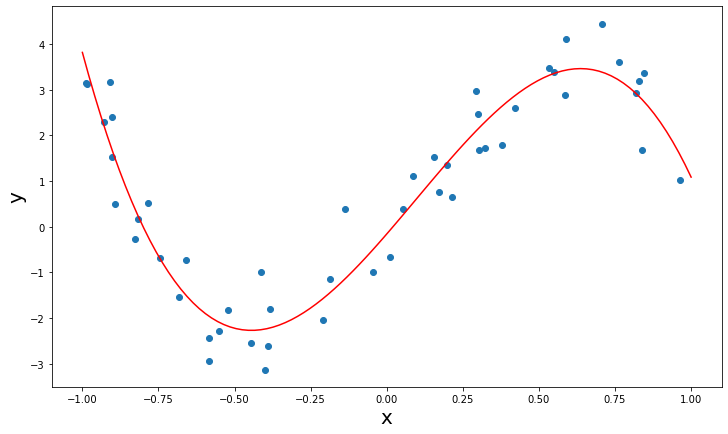

In [5]:
'plot datapoints + linear model'

'plot datapoints'
plt.figure(figsize=(12,7))
plt.plot(x,y,'o')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

'plot linear model'
m_plot = 100
x_plot = np.linspace(-1,1,m_plot)        
X_plot = np.ones((m_plot,degree+1))
for i in range(degree):
    X_plot[:,i+1] = x_plot**(i+1)
y_plot = X_plot.dot(theta) # evaluate the polynomial regression model at x_plot
plt.plot(x_plot,y_plot,'r',label='linear model')

'Mean Squared Error'
MSE = np.linalg.norm(y-X.dot(theta))**2/m
print('Mean Squared Error: '+str(MSE))

The cell below allows you to interactively change the degree of the linear model. 
Notice that the larger the degree, the smaller the Mean Squared Error.

In [6]:
examples.interactive_polynomial_model(x,y)

interactive(children=(IntText(value=0, description='model degree'), Output()), _dom_classes=('widget-interact'…

## 3. Example: Predicting Body Fat Percentage by Body Mass Index

In [7]:
import pandas as pd

In [8]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/bmi.csv'
data = pd.read_csv(url) #pandas data frame
data.head(10) #first 10 rows of the dataframe

,Height M,Weight kg,BMI,%Fat
0,1.60020,49.441572,19.308287,23.9
1,1.65100,62.595751,22.964168,28.8
2,1.65100,75.749931,27.789971,32.4
3,1.53035,48.987979,20.917414,25.8
4,1.45415,43.091278,20.378441,22.5
5,1.60655,52.616718,20.386152,22.1
6,1.56210,47.967396,19.657509,19.6
7,1.49860,45.586036,20.298333,25.3
8,1.52400,47.853998,20.603846,22.8
9,1.47955,44.452055,20.306382,26.4


We will use a regression model to predict body fat percentage based on body mass index (BMI). The data includes height, weight, and body fat.
Why might we want to use BMI to predict body fat percentage? 
It is more expensive to obtain your body fat percentage through a direct measure like DXA. 
If you can use your BMI to predict your body fat percentage, that provides valuable information more easily and cheaply. Let’s see if BMI can produce good predictions.

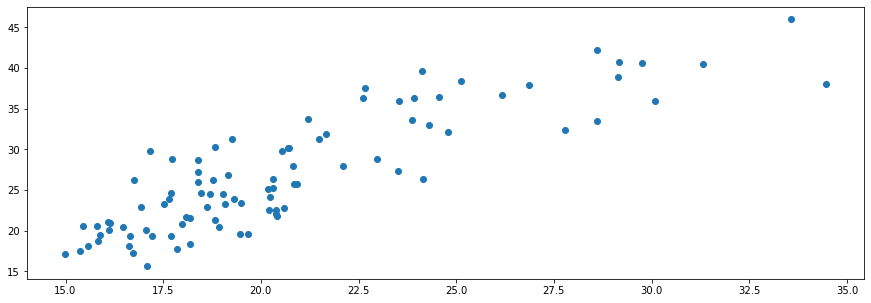

In [9]:
x = data['BMI'].to_numpy()
y = data['%Fat'].to_numpy()
plt.figure(figsize=(15,5))
plt.plot(x,y,'o')

The plot shows that the two variables are roughly correlated: the higher the BMI, the higher is the %Fat.
We can quantify this by attempting to fit a linear model

$$ 
  \mbox{%Fat} =\theta_0 + \theta_1 \cdot \mbox{BMI},
$$

Mean Squared Error: 12.916022126540073


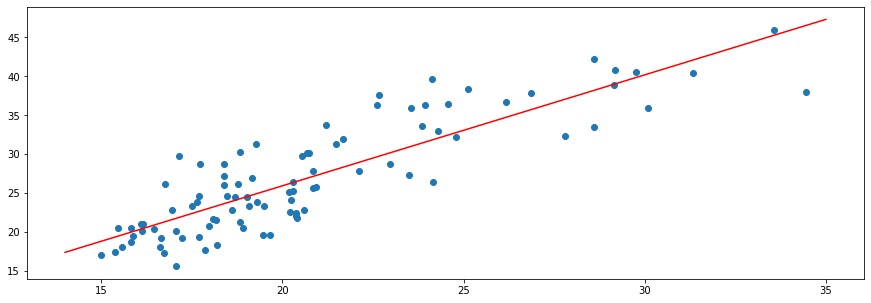

In [10]:
'build feature matrix'
m = len(x)
X = np.ones((m,2))
X[:,1] = x

'find linear model coefficients'
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))

'plot datapoints '
plt.figure(figsize=(15,5))
plt.plot(x,y,'o')

'plot linear model'
m_plots = 100
x_plot = np.linspace(14, 35, m_plots) 
X_plot = np.ones((m_plots,2))
X_plot[:,1] = x_plot
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')

'Mean Squared Error'
MSE = np.linalg.norm(y-X.dot(theta))**2/m
print('Mean Squared Error: '+str(MSE))

We can add powers of the BMI variable to our linear model

$$
  \mbox{%Fat} =\theta_0 + \theta_1 \cdot \mbox{BMI}+\theta_2\cdot\mbox{BMI}^2,
$$

Mean Squared Error: 12.081800028988804


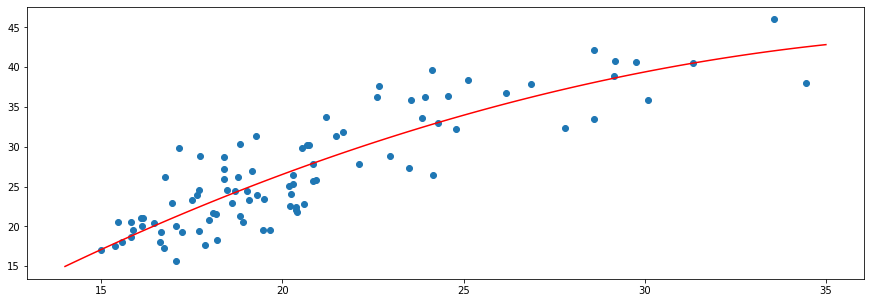

In [11]:
'build feature matrix'
degree=2
X = np.ones((m,degree+1))
for i in range(degree):
    X[:,i+1] = x**(i+1)
    
'best linear model'
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))

'plot datapoints '
plt.figure(figsize=(15,5))
plt.plot(x,y,'o')

'plot linear model'
m_plot = 100
x_plot = np.linspace(14, 35, m_plot) 
X_plot = np.ones((m_plot,degree+1))
for i in range(degree):
    X_plot[:,i+1]=x_plot**(i+1)
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r-')

'Mean Squared Error'
MSE = np.linalg.norm(y-X.dot(theta))**2/m
print('Mean Squared Error: '+str(MSE))